# Assignment 1 DAVE3625
## Students: 
- S345867 Mohammed Ali Ansar
- S341825 Lavrans Bjerkestrand



# Task 1.1
5 unique features: 
1. Ledig_Kapasitet
2. Forsinkelse_Ankomst_Holdeplass_Fra
3. Forsinkelse_Avgang_Holdeplass_Fra
4. Tid_Brukt_På_Holdeplass
5. 

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib
from matplotlib import pyplot as plot
import numpy as np
from scipy import stats

url = 'https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv'
df = pd.read_csv(url,sep = ';')
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [2]:
# Parse dates and times
df['Dato'] = pd.to_datetime(df['Dato'], errors='coerce')

df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra']  = pd.to_datetime(df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'],    errors='coerce')
df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra']   = pd.to_datetime(df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'],     errors='coerce')
df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'],   errors='coerce')
df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra']  = pd.to_datetime(df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'],    errors='coerce')

In [3]:
# Calculate delay
df['Forsinkelse_Ankomst_Holdeplass_Fra'] = df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] - df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra']
df['Forsinkelse_Avgang_Holdeplass_Fra'] = df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'] - df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra']

# Calculate time spent at bus stop
df['Tid_Brukt_På_Holdeplass'] = df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'] - df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra']

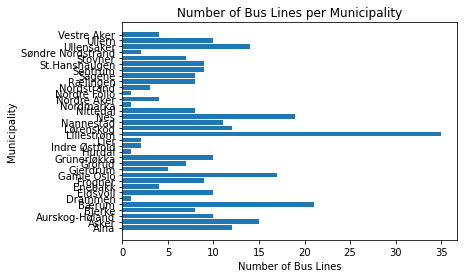

In [4]:
antall = df.groupby('Kommune')['Linjenavn'].nunique()
antall

plot.figure()
plot.barh(width=antall, y=antall.index)
plot.title('Number of Bus Lines per Municipality')
plot.xlabel('Number of Bus Lines')
plot.ylabel('Municipality')
plot.rcParams['figure.figsize']=30,20
plot.show()

In [5]:
# Ledig plasser
df['Ledige_Plasser'] = 100 - ((df['Passasjerer_Ombord'] / df['Kjøretøy_Kapasitet']) * 100)

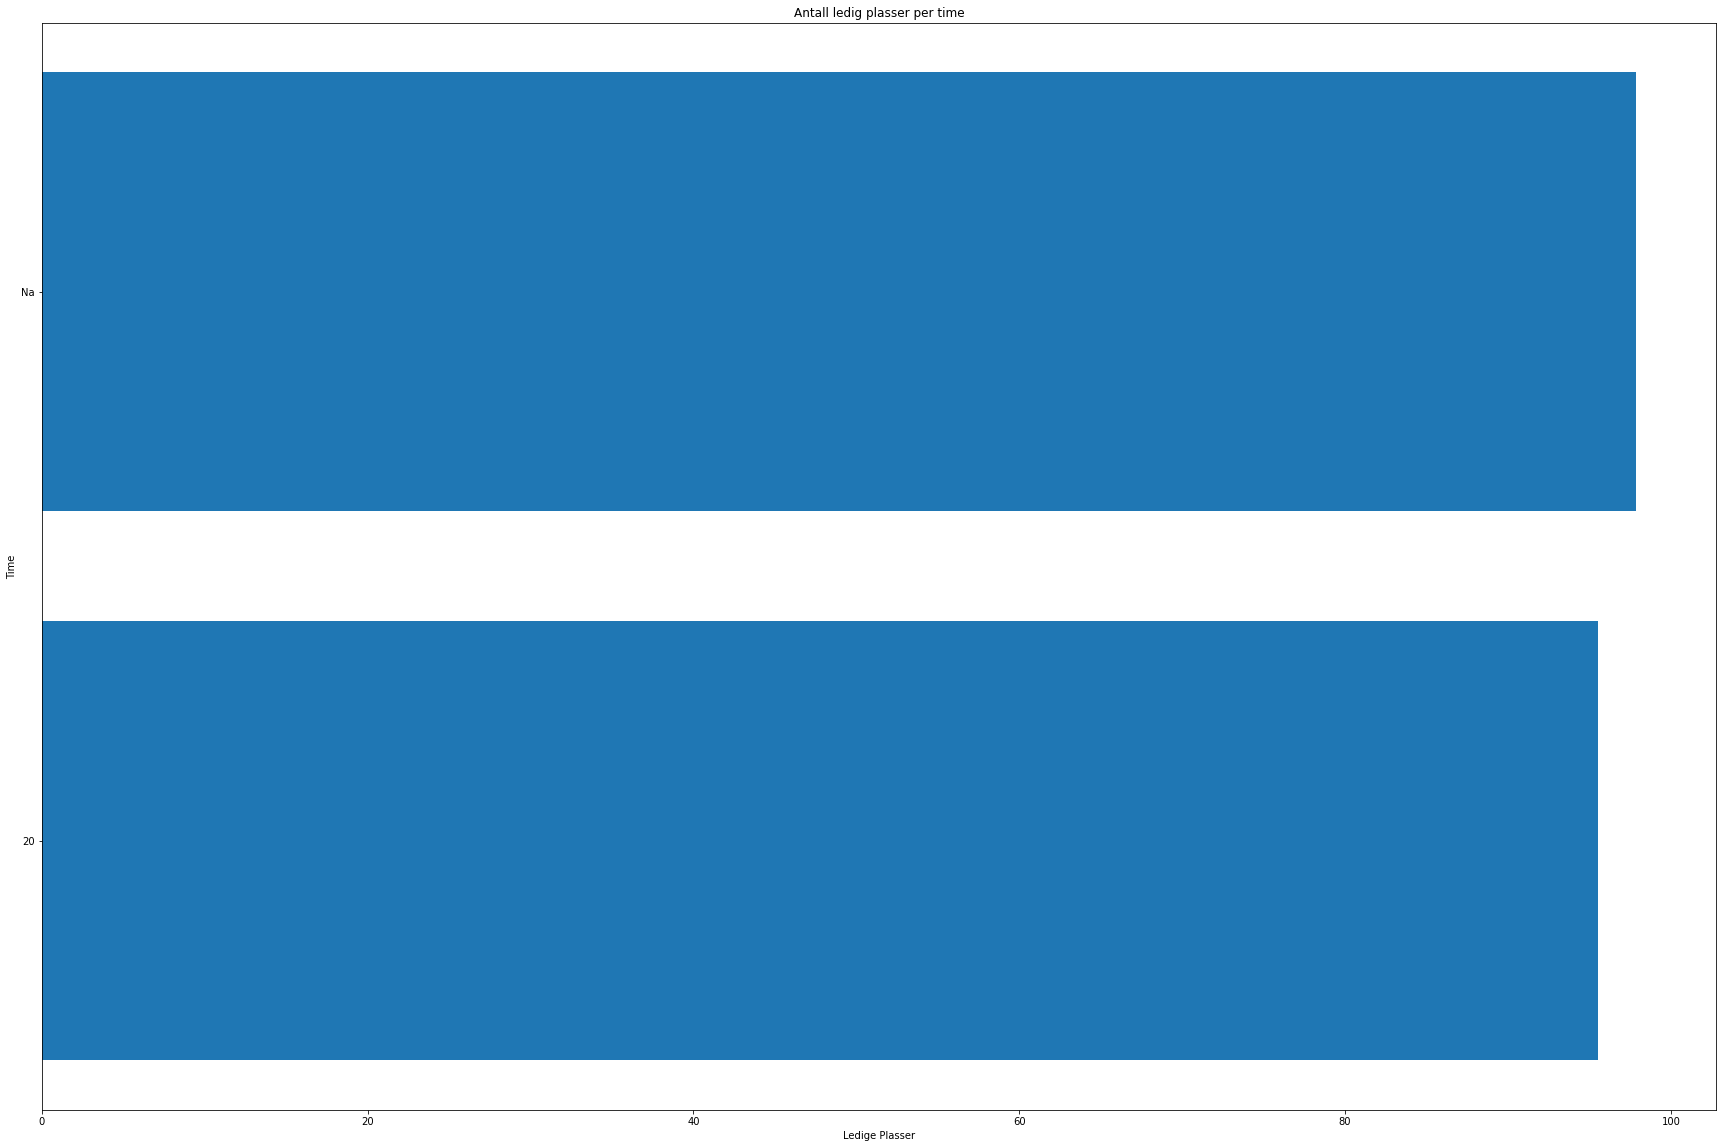

In [6]:
df['Timer'] = df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'].astype(str).str[:2]

antall = df.groupby('Timer')['Ledige_Plasser'].mean()
antall

plot.figure()
plot.barh(width=antall, y=antall.index)
plot.title('Antall ledig plasser per time')
plot.xlabel('Ledige Plasser')
plot.ylabel('Time')
plot.rcParams['figure.figsize']=10,15
plot.show()